In [10]:

from scipy import optimize
from matplotlib.ticker import AutoMinorLocator
from matplotlib import gridspec
import matplotlib.ticker as ticker

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
from scipy.integrate import quad

# Single Gaussian Curva Fitting

In [11]:
x_data = [1.0, 3.02040816, 5.04081633, 7.06122449, 9.08163265, 11.10204082, 13.12244898, 15.14285714, 17.16326531, 19.18367347, 21.20408163, 23.2244898, 25.24489796, 27.26530612, 29.28571429, 31.30612245, 33.32653061, 35.34693878, 37.36734694, 39.3877551, 41.40816327, 43.42857143, 45.44897959, 47.46938776, 49.48979592, 51.51020408, 53.53061224, 55.55102041, 57.57142857, 59.59183673, 61.6122449, 63.63265306, 65.65306122, 67.67346939, 69.69387755, 71.71428571, 73.73469388, 75.75510204, 77.7755102, 79.79591837, 81.81632653, 83.83673469, 85.85714286, 87.87755102, 89.89795918, 91.91836735, 93.93877551, 95.95918367, 97.97959184, 100.0]
y_data = [0.26287091, 0.48447151, 0.42825627, 0.27658759, 0.37862103, 0.42042918, 0.21416517, 0.3139994, 0.37545321, 0.46983736, 0.41854903, 0.4787398, 0.53944026, 0.78446197, 0.67567986, 0.90964432, 1.28406181, 1.81645755, 2.09598432, 2.7789668, 2.97900929, 3.42652787, 3.93155661, 4.21266923, 4.3933779, 4.36469044, 3.98596974, 3.92569373, 3.47611656, 2.80078463, 2.26082742, 1.85062037, 1.5780703, 1.09410913, 0.80182856, 0.69213099, 0.50661808, 0.46938787, 0.29603221, 0.36806829, 0.27090137, 0.27101623, 0.2104083, 0.43949568, 0.23754978, 0.32886814, 0.27371143, 0.45475795, 0.32889327, 0.27120174]
x_data = np.array(x_data)
A1 = max(y_data)  # Amplitud estimada como el valor máximo de y
mu1 = x_data[np.argmax(y_data)]  # Media estimada como el valor de x correspondiente al máximo de y
sigma1 = (max(x_data) - min(x_data)) / 4 

In [12]:
def gaussian(x, A, mu, sigma):
    return A * np.exp(-(x - mu)**2 / (2 * sigma**2))

popt, pcov = curve_fit(gaussian, x_data, y_data, p0=[A1, mu1, sigma1])

perr_gauss = np.sqrt(np.diag(pcov))

Amplitud = 4.246 (+/-) 0.096
mu = 49.975 (+/-) 0.291
sigma = 11.173 (+/-) 0.291


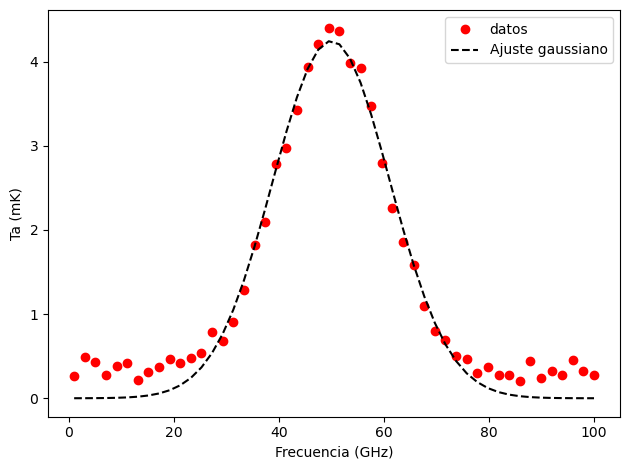

In [13]:
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_data, y_data, "ro",label= "datos")
ax1.plot(x_data, gaussian(x_data, *popt), 'k--',label="Ajuste gaussiano")

ax1.set_xlabel('Frecuencia (GHz)')
ax1.set_ylabel('Ta (mK)')
ax1.legend()

fig.tight_layout()
fig.savefig("fitGaussian.png", format="png",dpi=1000)

# this cell prints the fitting parameters with their errors
print("Amplitud = %0.3f (+/-) %0.3f" % (popt[0], perr_gauss[0]))
print("mu = %0.3f (+/-) %0.3f" % (popt[1], perr_gauss[1]))
print("sigma = %0.3f (+/-) %0.3f" % (popt[2], perr_gauss[2]))

# Multiple Gaussian Curva Fitting

In [14]:

x_data= [87.22, 87.22544898, 87.23089796, 87.23634694, 87.24179592, 87.2472449,
87.25269388, 87.25814286, 87.26359184, 87.26904082, 87.2744898, 87.27993878,
87.28538776, 87.29083673, 87.29628571, 87.30173469, 87.30718367, 87.31263265,
87.31808163, 87.32353061, 87.32897959, 87.33442857, 87.33987755, 87.34532653,
87.35077551, 87.35622449, 87.36167347, 87.36712245, 87.37257143, 87.37802041,
87.38346939, 87.38891837, 87.39436735, 87.39981633, 87.40526531, 87.41071429,
87.41616327, 87.42161224, 87.42706122, 87.4325102, 87.43795918, 87.44340816,
87.44885714, 87.45430612, 87.4597551, 87.46520408, 87.47065306, 87.47610204,
87.48155102, 87.487]

y_data=[1.21423772, 0.60988314, -0.03005671, -0.6295717, -1.11265173, -1.40328669,
-1.42546647, -1.10318096, -0.36840221, 0.75153657, 2.16653684, 3.78539669,
5.51691425, 7.26988761, 8.94451937, 10.40339452, 11.49881008, 12.08306286,
12.00844963, 11.12906843, 9.46260451, 7.31874714, 5.03740553, 2.95848889,
1.4219064, 0.74670542, 0.92935965, 1.71258625, 2.83225284, 4.02422705,
5.02437649, 5.5913124, 5.70340907, 5.46215698, 4.97040223, 4.33099095,
3.64676882, 3.00332309, 2.42313609, 1.9142708, 1.48479021, 1.14275732,
0.89606861, 0.74314954, 0.66803595, 0.65355919, 0.6825506, 0.73784156,
0.8022634, 0.85864749]

#x_data = [1.0, 3.02040816, 5.04081633, 7.06122449, 9.08163265, 11.10204082, 13.12244898, 15.14285714, 17.16326531, 19.18367347, 21.20408163, 23.2244898, 25.24489796, 27.26530612, 29.28571429, 31.30612245, 33.32653061, 35.34693878, 37.36734694, 39.3877551, 41.40816327, 43.42857143, 45.44897959, 47.46938776, 49.48979592, 51.51020408, 53.53061224, 55.55102041, 57.57142857, 59.59183673, 61.6122449, 63.63265306, 65.65306122, 67.67346939, 69.69387755, 71.71428571, 73.73469388, 75.75510204, 77.7755102, 79.79591837, 81.81632653, 83.83673469, 85.85714286, 87.87755102, 89.89795918, 91.91836735, 93.93877551, 95.95918367, 97.97959184, 100.0]
#y_data = [0.26287091, 0.48447151, 0.42825627, 0.27658759, 0.37862103, 0.42042918, 0.21416517, 0.3139994, 0.37545321, 0.46983736, 0.41854903, 0.4787398, 0.53944026, 0.78446197, 0.67567986, 0.90964432, 1.28406181, 1.81645755, 2.09598432, 2.7789668, 2.97900929, 3.42652787, 3.93155661, 4.21266923, 4.3933779, 4.36469044, 3.98596974, 3.92569373, 3.47611656, 2.80078463, 2.26082742, 1.85062037, 1.5780703, 1.09410913, 0.80182856, 0.69213099, 0.50661808, 0.46938787, 0.29603221, 0.36806829, 0.27090137, 0.27101623, 0.2104083, 0.43949568, 0.23754978, 0.32886814, 0.27371143, 0.45475795, 0.32889327, 0.27120174]

x_data = np.array(x_data)
A1 = max(y_data)  # Amplitud estimada como el valor máximo de y
mu1 = x_data[np.argmax(y_data)]  # Media estimada como el valor de x correspondiente al máximo de y
sigma1 = (max(x_data) - min(x_data)) / 4 

In [15]:
def ngaussians(x, *params):
    n = len(params) // 3
    y = np.zeros_like(x)
    for i in range(n):
        amp, mu, sigma = params[i*3:(i+1)*3]
        y += amp * np.exp(-(x - mu)**2 / (2 * sigma**2))
    return y

p0=[A1, mu1, sigma1]
p0=[10, 87.25, 0.1, 5, 87.4, 0.1]
popt, pcov_2gauss = curve_fit(ngaussians, x_data, y_data, p0=p0)

perr = np.sqrt(np.diag(pcov_2gauss))

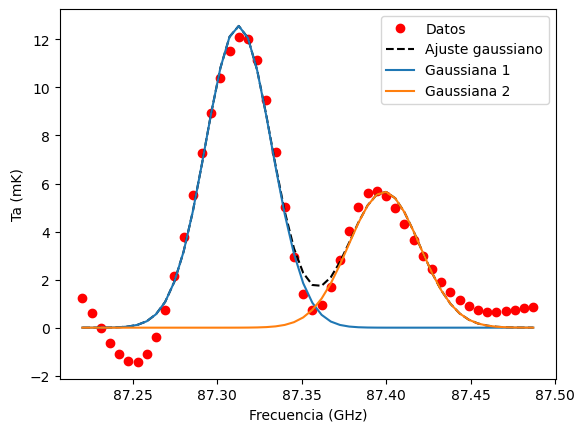

In [16]:
fig = plt.figure()
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.plot(x_data, y_data, "ro",label="Datos")
ax1.plot(x_data, ngaussians(x_data, *popt), 'k--',label="Ajuste gaussiano")
if int(len(popt)/3)>1:
    for i in range(int(len(popt)/3)):
        ax1.plot(x_data, ngaussians(x_data, *popt[i*3:(i+1)*3]), label= "Gaussiana " + str(i+1))

ax1.set_xlabel('Frecuencia (GHz)')
ax1.set_ylabel('Ta (mK)')

ax1.legend()

-------------Curva 1-------------
Amplitud (a) = 12.557 (+/-) 0.349
Media (mu) = 87.312 (+/-) 0.001
Desviación estándar (sigma) = 0.020 (+/-) 0.001
Area = 113.094
-------------Curva 2-------------
Amplitud (a) = 5.658 (+/-) 0.337
Media (mu) = 87.399 (+/-) 0.001
Desviación estándar (sigma) = 0.021 (+/-) 0.002
Area = 54.819


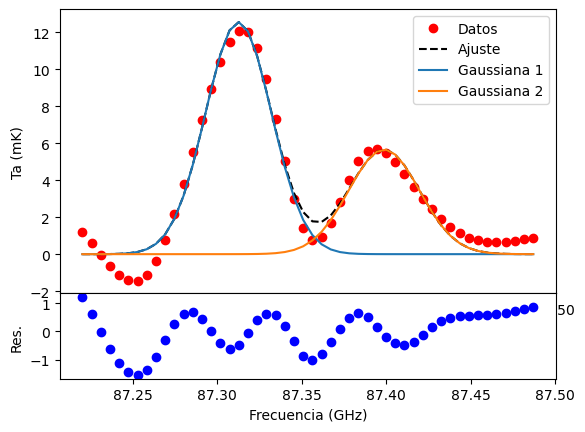

In [17]:
fig = plt.figure()
gs = gridspec.GridSpec(2,1, height_ratios=[1,0.30])
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])
gs.update(hspace=0) 

ax1.plot(x_data, y_data, "ro",label="Datos") #Datos 
ax1.plot(x_data, ngaussians(x_data, *popt), 'k--',label="Ajuste") # Ajuste a n-gaussianas
for i in range(int(len(popt)/3)): #Impresión de Gaussianas
    ax1.plot(x_data, gaussian(x_data, *popt[i*3:(i+1)*3]), label= "Gaussiana " + str(i+1))
ax2.plot(x_data, y_data - (ngaussians(x_data, *popt)), "bo") # residuo entre los datos y el ajuste

ax2.set_xlabel('Frecuencia (GHz)')
ax1.set_ylabel('Ta (mK)')
ax2.set_ylabel("Res.")
ax1.legend()

fig.savefig("fitGaussian.png", format="png",dpi=1000)

# Iterar sobre cada curva para imprimir los parámetros de ajuste y su error
for i in range(int(len(popt)/3)):
    offset = i * 3  # para obtener los índices correctos de los parámetros en popt
    print("-------------Curva {}-------------".format(i+1))
    print("Amplitud (a) = %0.3f (+/-) %0.3f" % (popt[offset], perr[offset]))
    print("Media (mu) = %0.3f (+/-) %0.3f" % (popt[offset+1], perr[offset+1]))
    print("Desviación estándar (sigma) = %0.3f (+/-) %0.3f" % (popt[offset+2], perr[offset+2]))
    print("Area = %0.3f" % np.trapz(ngaussians(x_data, *popt[offset:offset+3])))

In [ ]:
# Función gaussiana
def gaussian(x, a, mu, sigma):
    return a * np.exp(-(x - mu)**2 / (2 * sigma**2))

def adj_gaussian(x_data,y_data):
    # Estimación inicial de los parámetros
    a_o = max(y_data)  # Amplitud estimada como el valor máximo de y
    mu_o = x_data[np.argmax(y_data)]  # Media estimada como el valor de X correspondiente al máximo de y
    sigma_o = (max(x_data) - min(x_data)) / 4  

    # Ajuste gaussiano
    params, covariance = curve_fit(gaussian, x_data, y_data, p0=[a_o, mu_o, sigma_o])

    # Parámetros óptimos del ajuste
    a_opt, mu_opt, sigma_opt = params

    # Cálculo de la integral de la gaussiana ajustada
    def integral(x):
        return gaussian(x, a_opt, mu_opt, sigma_opt)

    integral, error = quad(integral, min(x_data), max(x_data))

    # Gráfica de los datos y el ajuste
    plt.scatter(x_data, y_data, label='Interpolación')
    plt.plot(x_data, gaussian(x_data, *params[:3]), 'r-', label='Ajuste gaussiano')
    plt.title(galaxy)
    plt.xlabel('Frecuencia (GHz)')
    plt.ylabel('Ta (mK)')
    plt.legend()
    plt.show()

    # Imprimir los parámetros óptimos del ajuste
    print('Parámetros óptimos:')
    print('Amplitud (a):', a_opt)
    print('Media (mu):', mu_opt)
    print('Desviación estándar (sigma):', sigma_opt)

    # Imprimir el resultado de la integral
    print('Resultado de la integral:', integral)

adj_gaussian(x_data,cs(x_data))